# Project Name: Dimensionality Reduction for Music Analysis: PCA for Genre Classification

**Overview:**
This project introduces students to applying dimensionality reduction techniques, specifically Principal Component Analysis (PCA), to analyze and classify music data. Students will utilize PCA to simplify complex, high-dimensional audio feature datasets to effectively visualize and classify different music genres.

You have:
* A dataset containing various music audio features such as tempo, pitch, rhythm, spectral contrast, MFCCs (Mel-Frequency Cepstral Coefficients), and corresponding genre labels.</li>
* Familiarity with Python programming, scikit-learn, pandas, NumPy, and visualization tools such as matplotlib or seaborn.

We will:

Preprocess the music dataset, normalize features, and prepare it for PCA application.

Apply PCA to reduce dimensionality of audio features, capturing essential characteristics necessary for distinguishing between genres.

Visualize the PCA-transformed data using scatter plots and conduct genre classification analysis, interpreting how PCA facilitates improved genre separability.

**Goal:**
Students will develop practical skills in applying PCA for dimensionality reduction, gaining insights into feature importance and learning to effectively visualize and classify music data for real-world applications.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import base64
from IPython.display import display, HTML
import librosa
import librosa.display
import os
import warnings
warnings.filterwarnings('ignore')

## Notebook utility

In [9]:
prefix_path = "../input/images/"
image_paths = ["PCA_gif.gif", "PCA1.png", "PCA2.png", "PCA3.png", "PCA4.webp", "PCA5.webp"]
image_size = [1000, 700, 700, 400, 600, 500]
images_html = []

mime_map = {
    ".png": "image/png",
    ".jpg": "image/jpeg",
    ".jpeg": "image/jpeg",
    ".gif": "image/gif",
    ".webp": "image/webp"
}

for i, path in enumerate(image_paths):
    ext = os.path.splitext(prefix_path+path)[1].lower()
    mime = mime_map.get(ext, "image/png")

    with open(prefix_path+path, "rb") as f:
        data = f.read()
    encoded = base64.b64encode(data).decode("utf-8")

    img_tag = f'<img src="data:{mime};base64,{encoded}" style="display: block; margin-left: auto; margin-right: auto; width: {image_size[i]}px;" /><br>'
    images_html.append(img_tag)

## Theoretical Background


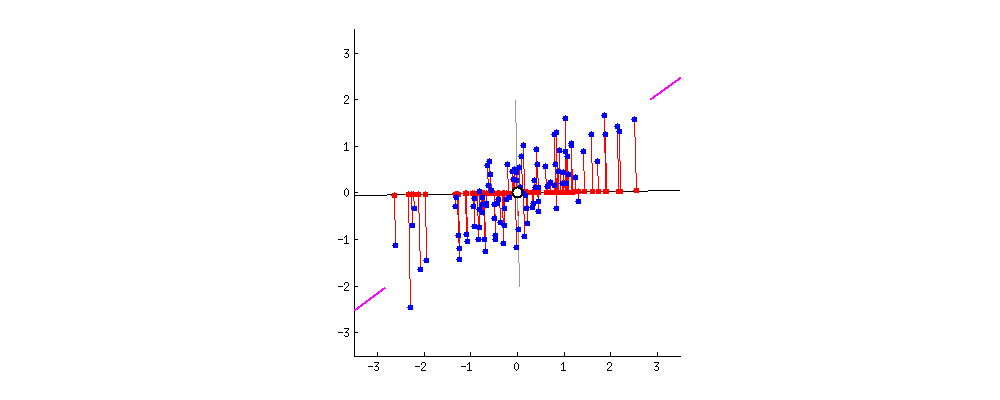

In [10]:
display(HTML(images_html[0]))


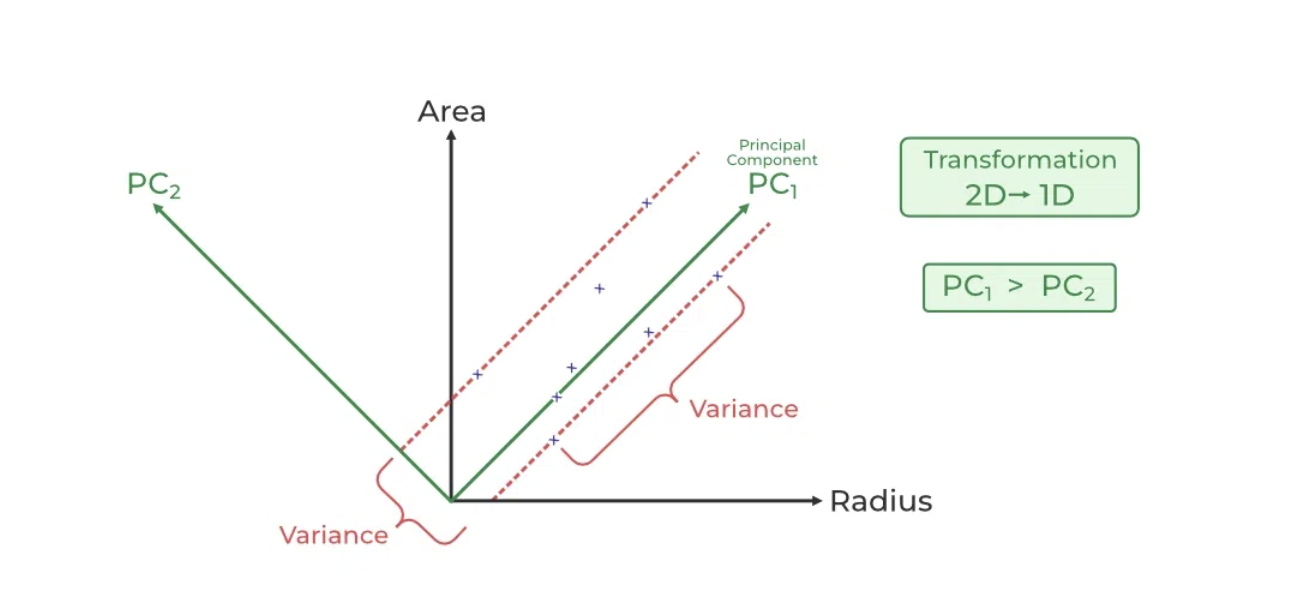

In [12]:
display(HTML(images_html[1]))


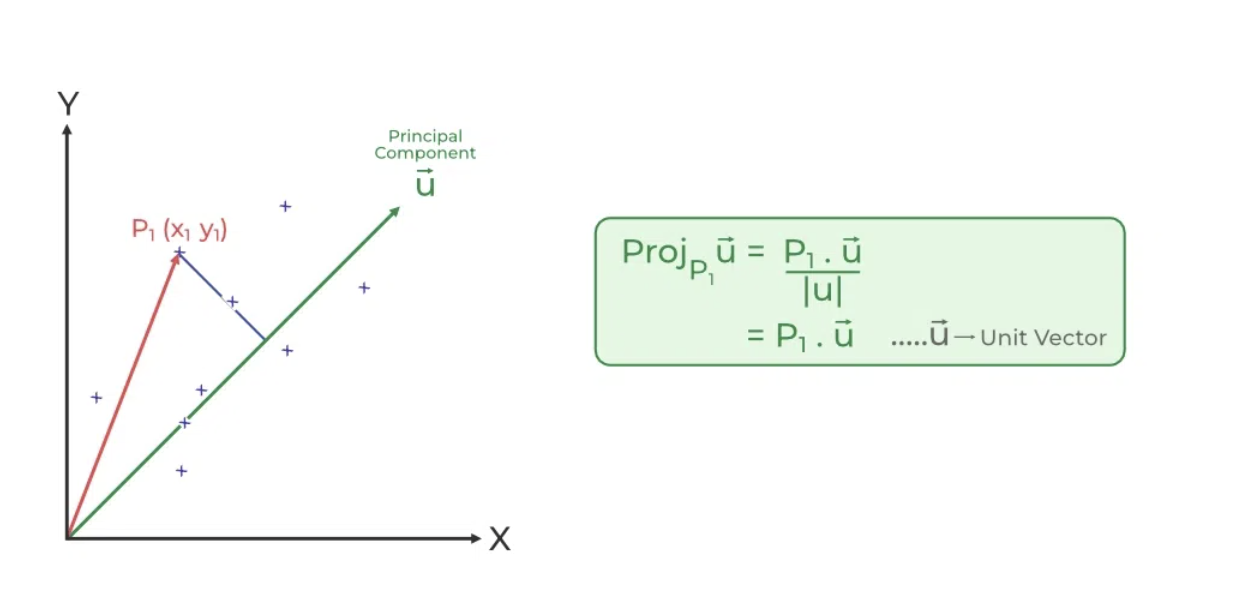

In [13]:
display(HTML(images_html[2]))

#### SVD Decomposition


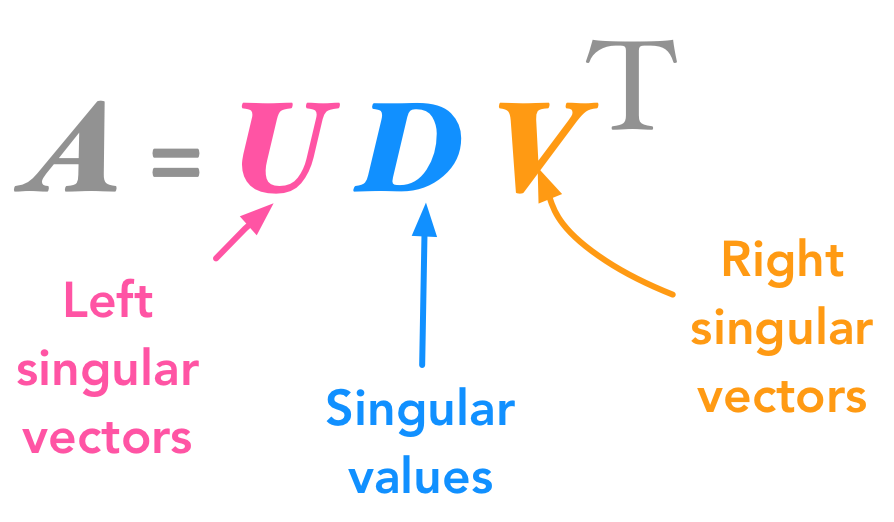

In [14]:
display(HTML(images_html[3]))


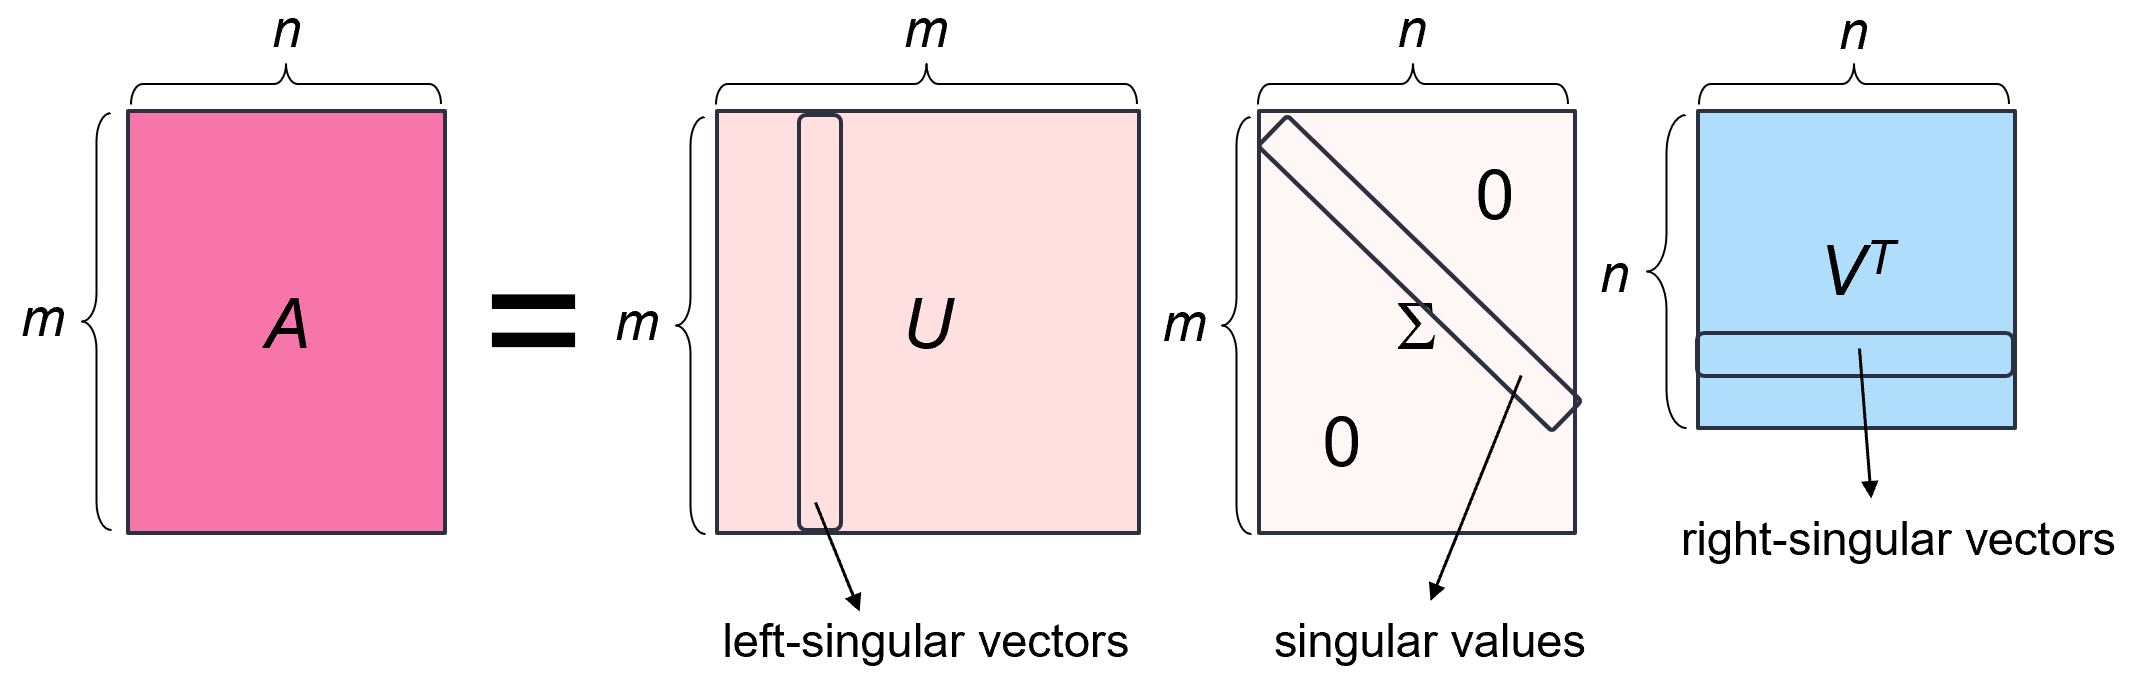

In [15]:
display(HTML(images_html[4]))

In [16]:
X = np.random.rand(100, 3)
X_centered = 0.01 * (X - X.mean(axis=0))
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt[0]
c2 = Vt[1]
W2 = Vt[:2].T
X2D = X_centered @ W2

#### EVD Decompostion


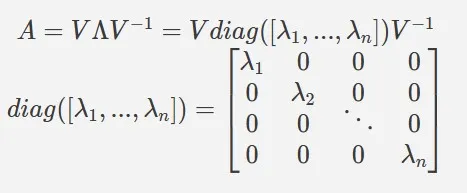

In [17]:
display(HTML(images_html[5]))

In [19]:
X = np.random.rand(100, 10)
X_covariance = 0.001 * (X.T @ X)
evalue, evect = np.linalg.eig(X_covariance)

## Loading and inspecting the GTZAN dataset

In [2]:
general_path = '../input/gtzan-dataset-music-genre-classification/Data'

In [4]:
df = pd.read_csv(general_path+'/features_3_sec.csv')

In [5]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


#### a) Data Numerical Info

In [24]:
print("Data Info:")
display(df.info())
print("\nDescriptive Statistics:")
display(df.describe())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean 

None


Descriptive Statistics:


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


#### b) Music Genre Distribution

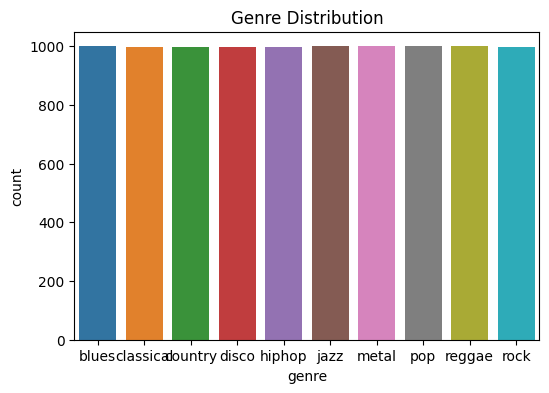

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title('Genre Distribution')
plt.xlabel('genre')
plt.ylabel('count')
plt.show()

#### c) Scatterplots for selective features

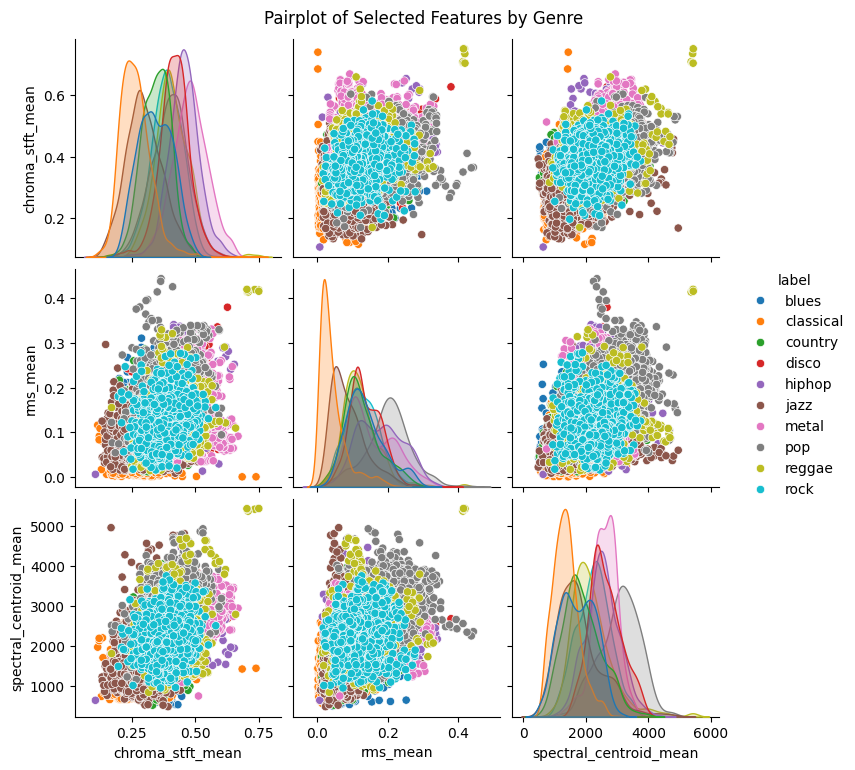

In [6]:
feature_columns = [col for col in df.columns if col not in ['filename', 'length', 'label']]
sns.pairplot(df, hue='label', vars=['chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean'])
plt.suptitle('Pairplot of Selected Features by Genre', y=1.02)
plt.show()

#### d) Raw audio analysis

In [39]:
y, sr = librosa.load(f'{general_path}/genres_original/reggae/reggae.00036.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [40]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Audio File shape: (661794,)


#### e) 2D Representation: Sound Waves

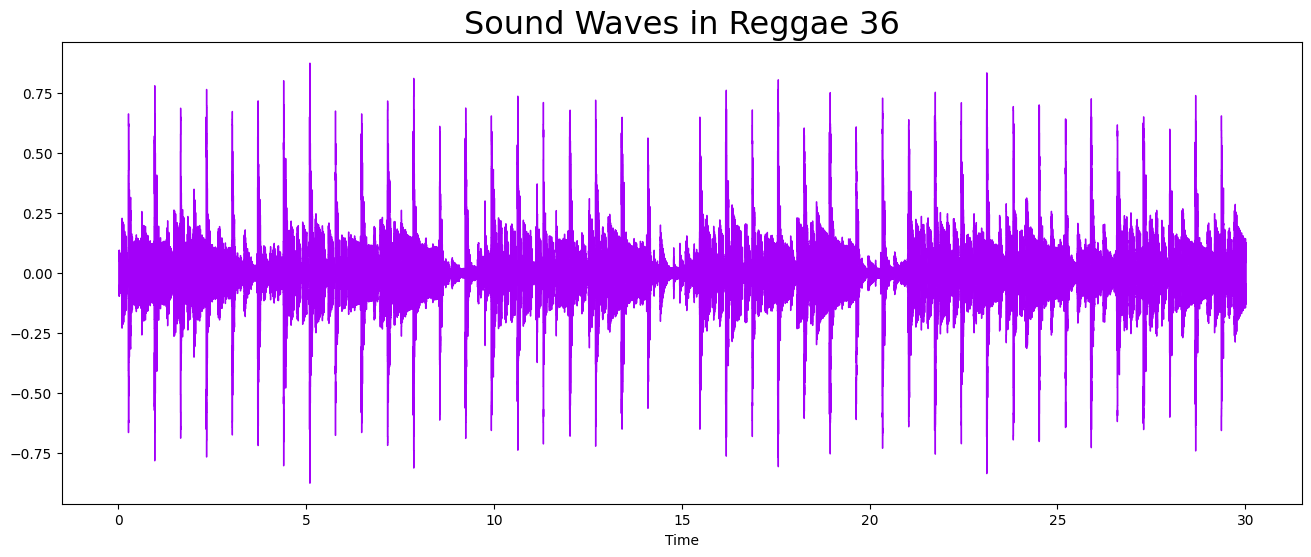

In [44]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Reggae 36", fontsize = 23);

#### f) Fourier Transform
* Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies
* Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes.

Shape of D object: (1025, 1293)


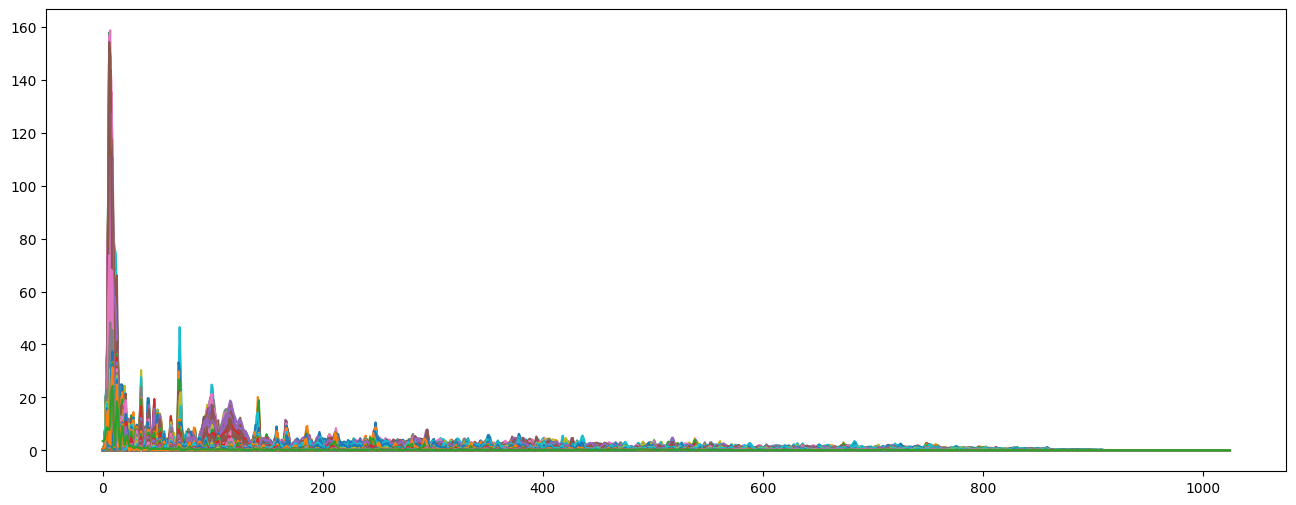

In [46]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

plt.figure(figsize = (16, 6))
plt.plot(D);

## Visulaizing PCA

In [7]:
# Prepare data for PCA
X = df[feature_columns].values
y = df['label'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 3 components (for 3D visualization)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio by each component:", pca.explained_variance_ratio_)
print("Total variance explained by first 3 components:", np.sum(pca.explained_variance_ratio_))

Explained variance ratio by each component: [0.20054986 0.13542712 0.1034532 ]
Total variance explained by first 3 components: 0.4394301713506748


#### Scree plot: Visualize variance explained by each principal component

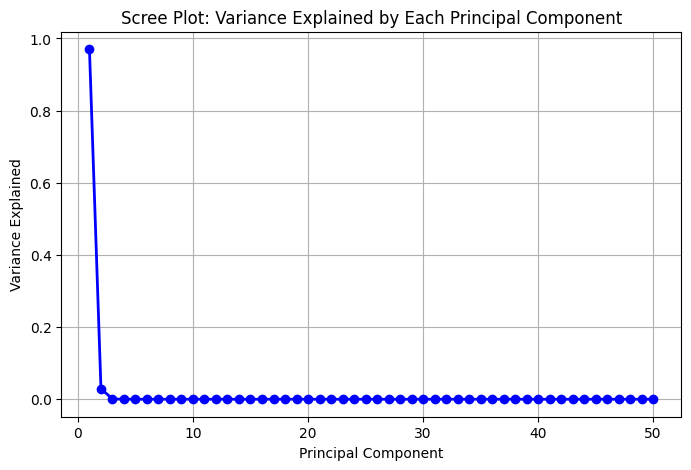

In [9]:
n_components_full = 50
pca_full = PCA(n_components=n_components_full, whiten=True, random_state=42)
X_pca_full = pca_full.fit_transform(X)

plt.figure(figsize=(8, 5))
components = np.arange(1, n_components_full + 1)
plt.plot(components, pca_full.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot: Variance Explained by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(np.arange(0, n_components_full + 1, 10))
plt.grid(True)
plt.show()

#### a) PCA in 2D space

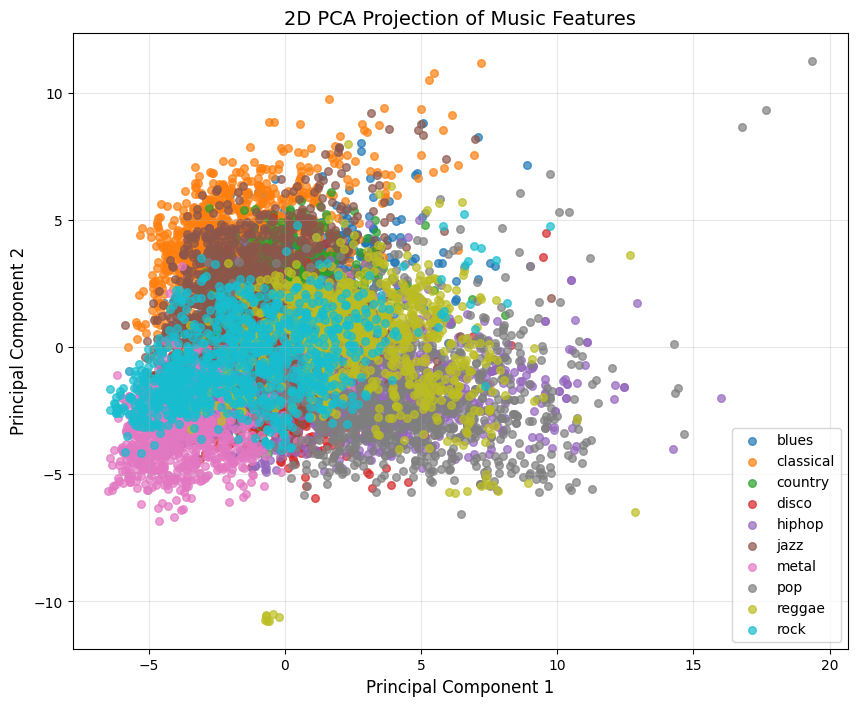

In [60]:
genres = np.unique(y)
colors = plt.cm.tab10(np.linspace(0, 1, len(genres)))
color_dict = dict(zip(genres, colors))

plt.figure(figsize=(10, 8))
for genre in genres:
    idx = y == genre
    plt.scatter(
        X_pca[idx, 0], X_pca[idx, 1], 
        label=genre, alpha=0.7, s=30,
        color=color_dict[genre]
    )
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('2D PCA Projection of Music Features', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#### b) PCA in 3D space

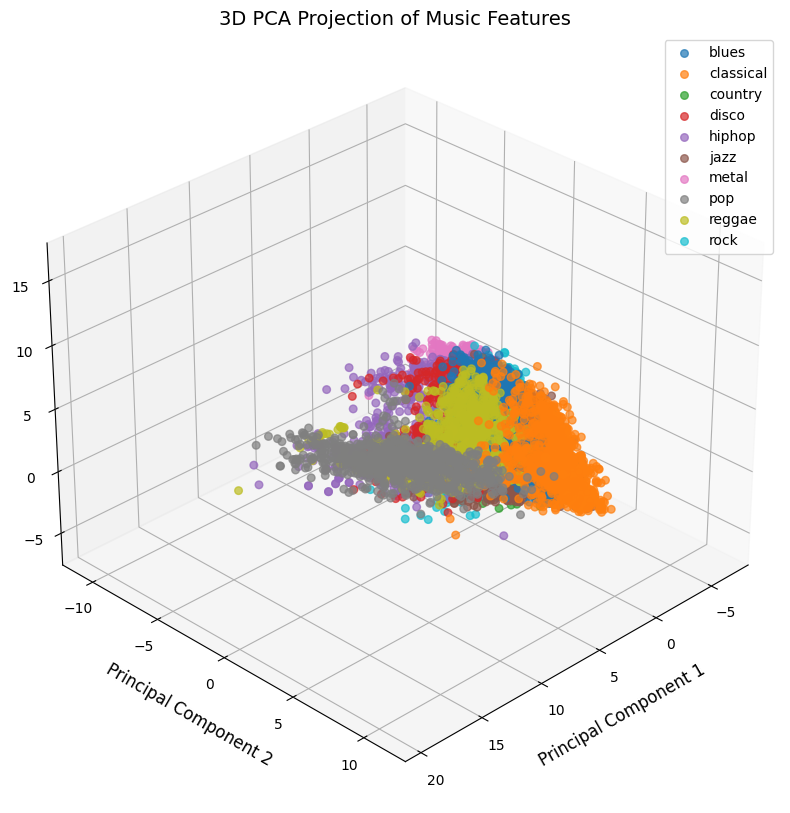

In [62]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for genre in genres:
    idx = y == genre
    ax.scatter(
        X_pca[idx, 0], X_pca[idx, 1], X_pca[idx, 2],
        label=genre, alpha=0.7, s=30,
        color=color_dict[genre]
    )

# Improve 3D plot appearance
ax.set_xlabel('Principal Component 1', fontsize=12, labelpad=10)
ax.set_ylabel('Principal Component 2', fontsize=12, labelpad=10)
ax.set_zlabel('Principal Component 3', fontsize=12, labelpad=10)
ax.set_title('3D PCA Projection of Music Features', fontsize=14)
ax.legend()
ax.view_init(30, 45)  # Adjust viewing angle for better visualization
plt.show()

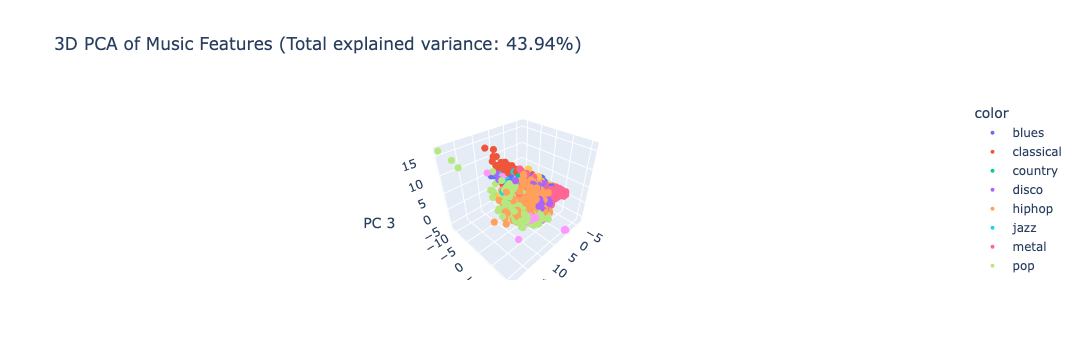

In [8]:
try:
    import plotly.express as px
    fig = px.scatter_3d(
        x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
        color=y,
        labels={'x': 'PC 1', 'y': 'PC 2', 'z': 'PC 3'},
        title=f'3D PCA of Music Features (Total explained variance: {np.sum(pca.explained_variance_ratio_)*100:.2f}%)'
    )
    fig.update_traces(marker=dict(size=4))
    fig.show()
except ImportError:
    print("Plotly not available for interactive 3D visualization. Using Matplotlib instead.")

## Evaluate PCA Effectiveness with KNN

In [66]:
# Split the PCA-reduced data (using all 3 components)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Train KNN classifier on reduced data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [67]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN classification accuracy on 3D PCA features: {accuracy:.2f}")

# Compare with performance on 2D PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_pca_2d, y, test_size=0.3, random_state=42, stratify=y)
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_2d, y_train_2d)
y_pred_2d = knn_2d.predict(X_test_2d)
accuracy_2d = accuracy_score(y_test_2d, y_pred_2d)
print(f"KNN classification accuracy on 2D PCA features: {accuracy_2d:.2f}")

KNN classification accuracy on 3D PCA features: 0.46
KNN classification accuracy on 2D PCA features: 0.37
